In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\9)KNN\Assignment Given\Zoo.csv"

In [21]:
path=path.replace('\\', '/')

In [22]:
df=pd.read_csv(path)

In [23]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D11B509B88>,
      dtype=object)

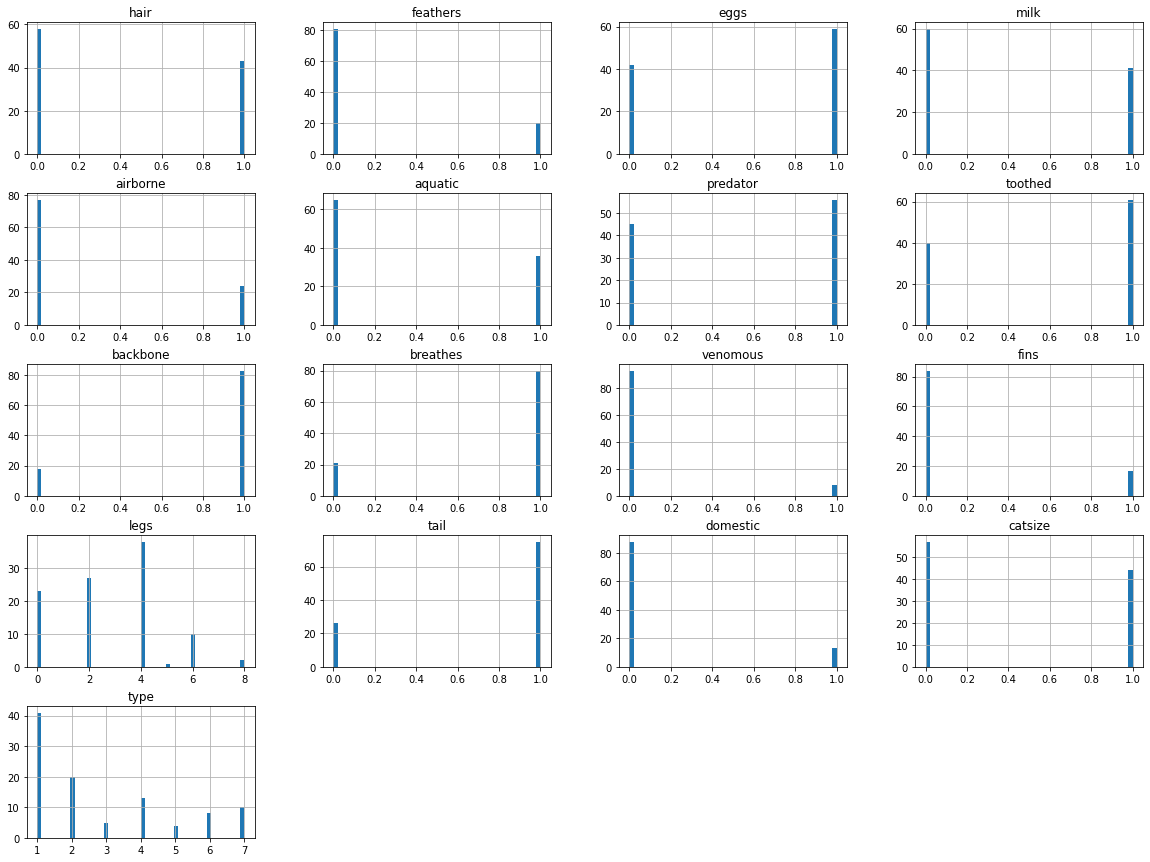

In [80]:
df.hist(bins=50, figsize=(20,15))

In [81]:
sns.pairplot(df,height=7,aspect=1, diag_kind="auto")

In [25]:
# Initial Observations
# 1) No missing values

In [26]:
y=df['type'].values
X=df.drop(['type','animal name'],axis=1).values

In [27]:
# Using KNN classifier to classify
from sklearn.neighbors import KNeighborsClassifier

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [30]:
acc=[]
for i in range(3, 50, 2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_acc = np.mean(neigh.predict(X_train) == y_train)
    test_acc = np.mean(neigh.predict(X_test) == y_test)
    acc.append([train_acc, test_acc])


In [38]:
acc

[[0.9857142857142858, 0.9354838709677419],
 [0.9142857142857143, 0.8709677419354839],
 [0.8857142857142857, 0.8064516129032258],
 [0.8285714285714286, 0.8064516129032258],
 [0.7857142857142857, 0.6451612903225806],
 [0.7571428571428571, 0.6451612903225806],
 [0.7285714285714285, 0.5806451612903226],
 [0.7285714285714285, 0.5806451612903226],
 [0.7285714285714285, 0.5806451612903226],
 [0.7428571428571429, 0.6129032258064516],
 [0.7428571428571429, 0.6129032258064516],
 [0.7428571428571429, 0.6129032258064516],
 [0.7428571428571429, 0.6129032258064516],
 [0.7285714285714285, 0.5806451612903226],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5857142857142857, 0.5483870967741935],
 [0.5285714

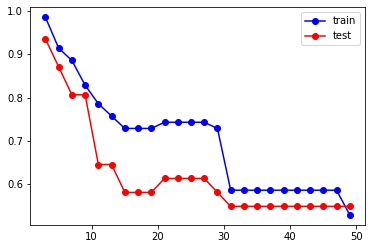

In [39]:
# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")
plt.legend(["train","test"])

In [64]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
pred=knn.predict(X_test)

In [73]:
pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7, 6, 6, 1, 1, 2], dtype=int64)

In [74]:
knn.score(X_train,y_train)

0.9857142857142858

In [79]:
knn.score(X_test,y_test)

0.9354838709677419

In [78]:
accuracy_score(y_test,pred)

0.9354838709677419

In [77]:
# Accuracy is 87%